In [1]:
import torch
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# autodiff or autograd

In [3]:
x = torch.tensor(5.0); x

tensor(5.)

In [4]:
x.requires_grad_()

tensor(5., requires_grad=True)

In [5]:
y = x**2

In [6]:
y.backward() # use autodiff

In [7]:
x.grad

tensor(10.)

In [8]:
# tensorflow
x = tf.Variable(5.0); x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>

In [9]:
with tf.GradientTape() as t:
    t.watch(x) # track forward pass
    y = x**2

In [10]:
t.gradient(y, x)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [11]:
# Directed Acyclic Graph of a Line Equation

In [22]:
x = torch.tensor(list(range(8))) # dosage of drug to treat a disease


In [ ]:
# y = -0.5*x + 2 + torch.normal(mean=torch.zeros(8), std=0.2)

In [23]:
y = torch.tensor([1.86,
                  1.31,
                  .62,
                  .33,
                  .09,
                  -0.67,
                  -1.23,
                  -1.37             
                ]); y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

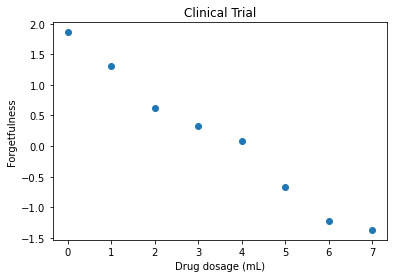

In [24]:
fig, ax = plt.subplots()
plt.title('Clinical Trial')
plt.xlabel('Drug dosage (mL)')
plt.ylabel('Forgetfulness')
_ = ax.scatter(x,y)

In [25]:
# initialize the slope parameter with a 'random'
# value of 0.9

# guessing 
# algebraic: Moore-Penroe pseudoinverse
# statistical: OLS
# this example has two parameters and 
# 8 data points
# scaling to millions of params and data points
# can't be done in other 3 ways

In [26]:
m = torch.tensor([0.9]).requires_grad_(); m

tensor([0.9000], requires_grad=True)

In [27]:
b = torch.tensor([0.1]).requires_grad_(); b

tensor([0.1000], requires_grad=True)

In [30]:
def regression_plot(x,y,m,b):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    
    x_min, x_max = ax.get_xlim()
    y_min, y_max = m * x_min + b, m * x_max + b
    
    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

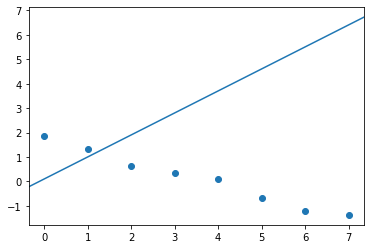

In [31]:
regression_plot(x,y,m,b)

In [34]:
def regression(x,m,b):
    return m*x + b #output = y

In [35]:
# step 1
yhat = regression(x,m,b); yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [37]:
def mse(yhat, y):
    sigma = torch.sum((yhat - y)**2)
    return sigma/len(y)

In [39]:
c = mse(yhat,y); c

tensor(19.6755, grad_fn=<DivBackward0>)

In [41]:
c.backward()

In [42]:
m.grad

tensor([36.3050])

In [43]:
b.grad

tensor([6.2650])

In [44]:
# gradient desecent
optimizer = torch.optim.SGD([m,b], lr=0.01)

In [45]:
optimizer.step()

In [46]:
m

tensor([0.5369], requires_grad=True)

In [47]:
b

tensor([0.0374], requires_grad=True)

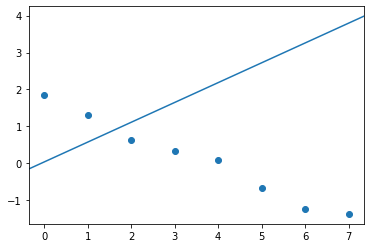

In [48]:
regression_plot(x,y,m,b)

In [49]:
C = mse(regression(x,m,b), y); C

tensor(8.5722, grad_fn=<DivBackward0>)

In [50]:
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    
    yhat = regression(x,m,b) #step 1 forward pass
    C = mse(yhat, y) # step 2 measure cost MSE
    
    C.backward() # step 3 calc gradients autodiff
    optimizer.step() # step 4 SGD optimizer to adjust m,b
    
    print(f'Epoch {epoch} Cost {C.item()}')

Epoch 0 Cost 8.572175979614258
Epoch 1 Cost 4.077259063720703
Epoch 2 Cost 2.2535147666931152
Epoch 3 Cost 1.509533405303955
Epoch 4 Cost 1.2020677328109741
Epoch 5 Cost 1.0711182355880737
Epoch 6 Cost 1.0115931034088135
Epoch 7 Cost 0.9810133576393127
Epoch 8 Cost 0.9622082114219666
Epoch 9 Cost 0.9482364654541016
Epoch 10 Cost 0.9362916350364685
Epoch 11 Cost 0.9252383708953857
Epoch 12 Cost 0.9146171808242798
Epoch 13 Cost 0.904241144657135
Epoch 14 Cost 0.8940345644950867
Epoch 15 Cost 0.8839651346206665
Epoch 16 Cost 0.8740199208259583
Epoch 17 Cost 0.8641921281814575
Epoch 18 Cost 0.8544788360595703
Epoch 19 Cost 0.8448775410652161
Epoch 20 Cost 0.8353870511054993
Epoch 21 Cost 0.826005756855011
Epoch 22 Cost 0.8167323470115662
Epoch 23 Cost 0.807565450668335
Epoch 24 Cost 0.7985040545463562
Epoch 25 Cost 0.7895468473434448
Epoch 26 Cost 0.7806925177574158
Epoch 27 Cost 0.7719401121139526
Epoch 28 Cost 0.7632883787155151
Epoch 29 Cost 0.7547361254692078
Epoch 30 Cost 0.7462820410

Epoch 340 Cost 0.03962622210383415
Epoch 341 Cost 0.039394404739141464
Epoch 342 Cost 0.039165280759334564
Epoch 343 Cost 0.038938794285058975
Epoch 344 Cost 0.03871488943696022
Epoch 345 Cost 0.03849358111619949
Epoch 346 Cost 0.03827481344342232
Epoch 347 Cost 0.03805854916572571
Epoch 348 Cost 0.03784478083252907
Epoch 349 Cost 0.03763347491621971
Epoch 350 Cost 0.037424586713314056
Epoch 351 Cost 0.03721810132265091
Epoch 352 Cost 0.03701399639248848
Epoch 353 Cost 0.03681224584579468
Epoch 354 Cost 0.036612797528505325
Epoch 355 Cost 0.03641564026474953
Epoch 356 Cost 0.03622077405452728
Epoch 357 Cost 0.036028120666742325
Epoch 358 Cost 0.03583770617842674
Epoch 359 Cost 0.035649463534355164
Epoch 360 Cost 0.03546338528394699
Epoch 361 Cost 0.03527945280075073
Epoch 362 Cost 0.035097647458314896
Epoch 363 Cost 0.0349179245531559
Epoch 364 Cost 0.03474024683237076
Epoch 365 Cost 0.03456464782357216
Epoch 366 Cost 0.03439103066921234
Epoch 367 Cost 0.03421942517161369
Epoch 368 Cos

Epoch 704 Cost 0.01976555772125721
Epoch 705 Cost 0.019762111827731133
Epoch 706 Cost 0.019758714362978935
Epoch 707 Cost 0.019755346700549126
Epoch 708 Cost 0.019752010703086853
Epoch 709 Cost 0.019748728722333908
Epoch 710 Cost 0.0197454746812582
Epoch 711 Cost 0.019742261618375778
Epoch 712 Cost 0.019739096984267235
Epoch 713 Cost 0.019735952839255333
Epoch 714 Cost 0.019732844084501266
Epoch 715 Cost 0.01972978375852108
Epoch 716 Cost 0.019726742058992386
Epoch 717 Cost 0.019723758101463318
Epoch 718 Cost 0.01972079835832119
Epoch 719 Cost 0.019717860966920853
Epoch 720 Cost 0.0197149608284235
Epoch 721 Cost 0.01971210353076458
Epoch 722 Cost 0.0197092667222023
Epoch 723 Cost 0.019706469029188156
Epoch 724 Cost 0.019703714177012444
Epoch 725 Cost 0.019700974225997925
Epoch 726 Cost 0.019698278978466988
Epoch 727 Cost 0.019695613533258438
Epoch 728 Cost 0.019692976027727127
Epoch 729 Cost 0.01969035156071186
Epoch 730 Cost 0.019687775522470474
Epoch 731 Cost 0.019685234874486923
Epo

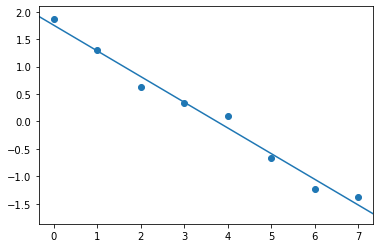

In [51]:
regression_plot(x,y,m,b)

In [53]:
m.item()

-0.4681258499622345

In [54]:
b.item()

1.7542961835861206